# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

,critics score (percent),budget (millions),length (minutes),curse words used (rate per hour)
0,0.0000,17.450712,205.339277,5.227405
1,0.1001,8.126236,194.555289,0.682894
2,0.2002,20.115728,174.979646,4.289700
3,0.3003,33.446048,158.973006,1.176559
4,0.4004,7.288500,189.184481,16.514857
...,...,...,...,...
995,99.5996,204.982695,108.178470,4.195313
996,99.6997,236.364697,83.384166,19.999572
997,99.7998,219.212243,64.025901,1.683303
998,99.8999,201.232115,80.127885,0.863609


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

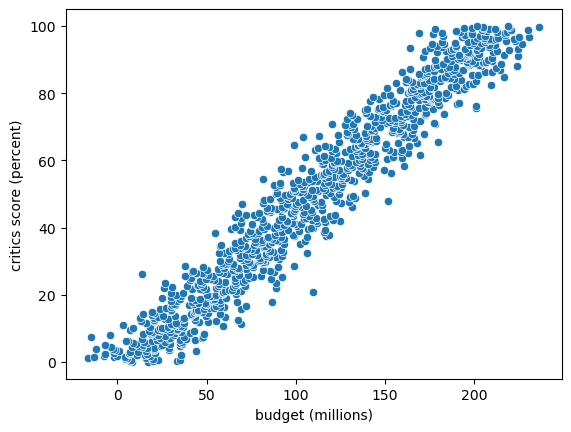

In [1]:
import pandas as pd
import seaborn as sns
data = pd.read_json('problem_set.json')
display(data)
data.info()
sns.scatterplot(data=data, x='budget (millions)', y='critics score (percent)')

In [2]:
score = 'critics score (percent)'
budget = 'budget (millions)'
length = 'length (minutes)'
words = 'curse words used (rate per hour)'

<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

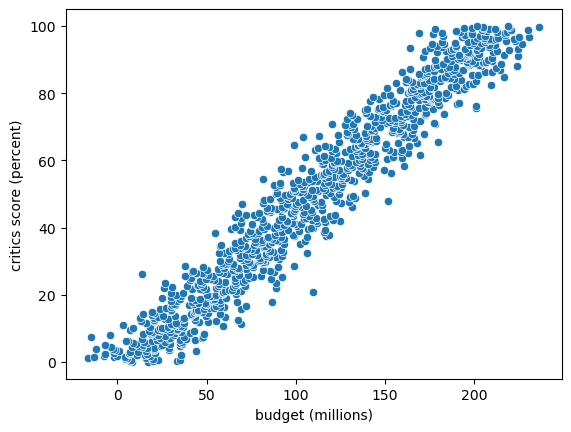

In [3]:
sns.scatterplot(data=data, x='budget (millions)', y='critics score (percent)')

***There is a clearly linear relationship between budget in millions and critic score as a percentage. Shown visually in this scatterplot of the two variables, as budget rises, so does critic score, with some varied but stable residuals between the score.***

In [4]:
def lineOfBestFit(df): 
    #Calculate the Means
    mean_x = data['budget (millions)'].mean()
    mean_y = data['critics score (percent)'].mean()
    
    #Calc the SLOPEEEEEE
    numerator = ((data['budget (millions)'] - mean_x) * (data['critics score (percent)'] - mean_y)).sum()
    denominator = ((data['budget (millions)'] - mean_x) ** 2).sum()
    m = numerator / denominator
    
    # dont forget the intercept
    b = mean_y - m * mean_x
    
    return f"y = {m}x + {b}"

display(lineOfBestFit(data))

'y = 0.4660326442323236x + -1.3987314019555939'

In [5]:
final = (.4660326442323236 * 10 + -1.39873140195555939)
display(final)

3.261595040367677

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

<AxesSubplot:xlabel='length (minutes)', ylabel='critics score (percent)'>

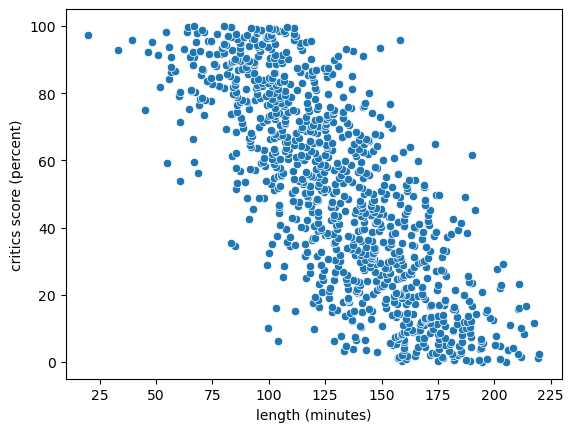

In [6]:
sns.scatterplot(data=data, x='length (minutes)', y='critics score (percent)')

In [7]:
def lineOfBestFitLengthCritic(df): 
    #Calculate the Means
    mean_x = data['length (minutes)'].mean()
    mean_y = data['critics score (percent)'].mean()
    
    #Calc the SLOPEEEEEE
    numerator = ((data['length (minutes)'] - mean_x) * (data['critics score (percent)'] - mean_y)).sum()
    denominator = ((data['length (minutes)'] - mean_x) ** 2).sum()
    m = numerator / denominator
    
    # dont forget the intercept
    b = mean_y - m * mean_x
    
    return f"y = {m}x + {b}"

display(lineOfBestFitLengthCritic(data))

'y = -0.634194370038437x + 132.67331245869113'

In [8]:
predictedOutcome = (-0.634194370038437 * 150 + 132.67331245869113)
predictedOutcome
#Wide range of possible outcomes makes this outcome of only 37 score innacurate. It can be literally any value of critic score

37.544156952925576

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

<AxesSubplot:xlabel='budget (millions)', ylabel='curse words used (rate per hour)'>

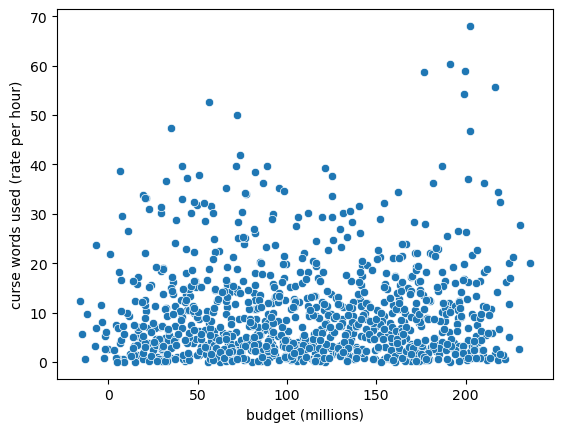

In [9]:
sns.scatterplot(data=data, x='budget (millions)', y='curse words used (rate per hour)')

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

In [10]:
def lineOfBestFitUni(df, x, y): 
    #Calculate the Means
    mean_x = data[x].mean()
    mean_y = data[y].mean()
    
    #Calc the SLOPEEEEEE
    numerator = ((data[x] - mean_x) * (data[y] - mean_y)).sum()
    denominator = ((data[x] - mean_x) ** 2).sum()
    m = numerator / denominator
    
    # dont forget the intercept
    b = mean_y - m * mean_x
    
    return f"y = {m}x + {b}"

lineOfBestFitUni(data, budget, words )


'y = 0.00578065095976985x + 9.240233598815546'

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

In [11]:
estOutcome = (0.00578065095976985 * 5 + 9.240233598815546)
estOutcome
#An even larger scale of varrying outcomes makes this answer even less likely to occure, with subsequent residuals being large. 

9.269136853614395

In [18]:
def calculate_residuals(df, x, y):
    mean_x = df[x].mean()
    mean_y = df[y].mean()
    
    numerator = ((df[x] - mean_x) * (df[y] - mean_y)).sum()     # Calculate the slope (m)
    denominator = ((df[x] - mean_x) ** 2).sum()
    m = numerator / denominator
    
    b = mean_y - m * mean_x     # Calculate the intercept (b)

    df['predicted'] = m * df[x] + b     # Predict values
    
    df['residuals'] = df[y] - df['predicted']    # Calculate residuals
    

    sum_squared_residuals = (data['residuals'] ** 2).sum()     # Calculate final residual value (e.g., sum of squared residuals)
    mean_residual = data['residuals'].mean()
    
    return df[['predicted', 'residuals']], sum_squared_residuals, mean_residual

residuals_data, sum_squared_residuals, mean_residual = calculate_residuals(data, budget, score)

print(residuals_data)
print(f"Sum of Squared Residuals: {sum_squared_residuals}")
print(f"Mean of Residuals: {mean_residual}")


      predicted  residuals
0      6.733870  -6.733870
1      2.388360  -2.288260
2      7.975855  -7.775655
3     14.188219 -13.887919
4      1.997948  -1.597547
..          ...        ...
995   94.129896   5.469704
996  108.754933  -9.055234
997  100.761330  -0.961530
998   92.382003   7.517897
999  100.470758  -0.470758

[1000 rows x 2 columns]
Sum of Squared Residuals: 49710.3738703839
Mean of Residuals: 1.8189894035458565e-14


***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***George used the LSQ method, while I used the LSR method. He also used the squars method. We used the least squars method***

***My solution was more accurate since I had a lower residual number at 1.81 for question 3. ***

***I'm not entirely sure why ***